# Modelamiento Dengue SIR SI

In [37]:
import numpy as np #para manejar matrices
from scipy.integrate import odeint #para resolver ecuaciones diferenciales ordinarias
import matplotlib.pyplot as plt #Para plotear
import math #para la raiz cuadrada

## Modelo SIR - SI

### SIR (Host - Humanos)

$S_h = - \dfrac{ \beta_{vh} S_h I_v}{N_h} $

$I_h = \dfrac{ \beta_{vh} S_h I_v}{N_h} - \gamma I_h$

$ R_h = \gamma I_h$

### SI (Vector - Mosquitos)

$S_v = - \dfrac{ \beta_{hv} S_v I_h}{N_h} - \mu_v S_v$

$I_v = \dfrac{ \beta_{hv} S_v I_h}{N_h} - \mu_v I_v$,

donde $S$ corresponde a la población susceptible,

$I$ corresponde a la población infectada/infecciosa,

$R$ corresponde a la población recuperada,

$N$ es el número total de la población

y los subíndices $v$ y $h$ corresponden a la población de vectores y hosts respectivamente.

En cuanto a los parámetros, estos son:

$\beta_{hv}$: tasa de trasmisibilidad host a vector.

$\beta_{vh}$: tasa de trasmisibilidad vector a host.

$u_v$: tasa de mortalidad de los vectores.

$\gamma$: tasa de recuperación.

Los parámetros $\beta$ están definidos como:

$\beta_{hv} = x_1 b b_h$ 

y

$\beta_{hv} = x_2 b b_m$,

donde $x_1$ y $x_2$ son la probabilidad de transmisión vector-a-host y host-a-vector respectivamente,

$b$ es la tasa de picaduras y, $b_h$ y $b_m$ son la probabilidad de transimisión del virus por picadurad vector-a-host y host-a-vector respectivamente.

In [38]:
beta = 0.1

In [39]:
T = [-2,0,2,2,7,10,11,17,18,20,22,20,21,23,25,26,27,25,27,27,28,29,30,31,30,32,33,30,32,33,31,30,29,25,26,23,24,25,26,24,23,22,20,19,18,15,17,20,22,18,15,14,12]

In [40]:
def temperatura(t):
    t=t-1
    temp=T[int(t)]
    return temp

Datos de la población de Humanos (Host)

In [41]:
N_h = 35
#N_h = 120
I0_h = 1
R0_h = 0
S0_h = N_h - I0_h

Datos de la población de mosquitos (Vector)

In [42]:
N_v = N_h*2
I0_v = 1
S0_v = N_v - I0_v 

Pamámetros de la ecuación

In [43]:
T=24.6
#x_1=0.3841
#x_2=1
x_1=0.381
x_2=1.0
if(T<=13.35 or T>=40.08):
    b=0
else:
    b=0.00202*T*(T-13.35) * math.sqrt(40.08 - T)   
    
if(T<=12.286 or T>=32.461):
    b_h=0
else:
    b_h=0.001044*T*(T-12.286) * math.sqrt(32.461 - T)
        
if(T>=12.4 and T<=26.1):
    b_m=-0.9037+0.0727*T
elif(T>26.1 and T<=32.5):
    b_m=1
else:
    b_m=0
        
beta_hv=x_2*b*b_m
beta_vh=x_1*b*b_h
u_v=(8.692/10000)-((1.590/10000)*T)+((1.116/100000)* (T**2)) - ((3.408/10000000)*(T**3)) + ((3.809/1000000000)*(T**4))
gamma= 1./20

In [44]:
# Initial conditions vector
S0vn = S0_v/N_v
I0vn = I0_v/N_v
S0hn = S0_h/N_h
I0hn = I0_h/N_h
R0hn = R0_h/N_h
#y0 = S0vn, I0vn,S0hn, I0hn, R0hn
y0 = S0_v, I0_v,S0_h, I0_h, R0_h

In [45]:
# A grid of time points (in days)
#t = np.linspace(0, 25, 25)
#t = np.linspace(0, 20, 20)
t= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

# The SIR model differential equations.
def deriv(y, t, x_1,x_2,k):
    Sv, Iv, Sh, Ih, Rh = y
    N_h=k
    T=temperatura(t)
    #T=26
    #x_1=0.3841
    #x_2=1
    
    if(T<=13.35 or T>=40.08):
        b=0
    else:
        b=0.00202*T*(T-13.35) * math.sqrt(40.08 - T)   
    
    if(T<=12.286 or T>=32.461):
        b_h=0
    else:
        b_h=0.001044*T*(T-12.286) * math.sqrt(32.461 - T)
        
    if(T>=12.4 and T<=26.1):
        b_m=-0.9037+0.0727*T
    elif(T>2.1 and T<=32.5):
        b_m=1
    else:
        b_m=0
    
    
    beta_hv=x_2*b*b_m
    beta_vh=x_1*b*b_h
    u_v=(8.692/10000)-((1.590/10000)*T)+((1.116/100000)* (T**2)) - ((3.408/10000000)*(T**3)) + ((3.809/1000000000)*(T**4))
    
    
    gamma= 1./5.9
    #beta_vh=0.7029998006809609
    #gamma=0.9999528248440659
    
    #print("beta_vh:",beta_vh,", gamma:",gamma,", beta_hv:",x_1,", u_v:",x_2,", k:",k)
    
    dShdt = -beta_vh * Sh * Iv/N_h
    dIhdt = beta_vh * Sh * Iv/N_h -(gamma * Ih)
    dRhdt = gamma * Ih
    dSvdt = -beta_hv * Sv * Ih/N_h - (u_v*Sv)
    dIvdt = beta_hv * Sv * Ih/N_h - (u_v*Iv)

    return dSvdt, dIvdt,dShdt, dIhdt, dRhdt








## Datos de Comas

In [46]:
import os
import pandas as pd
path = "./data/SIRSI/"
filename_read = os.path.join(path,"datosConcatenadosCiudadesLimaVARIOS.csv")
dataset = pd.read_csv(filename_read,delimiter=",",engine='python')
dataset=dataset[dataset['Distrito']=='LURIGANCHO']
dataset=dataset[dataset['Anho']==2017]
dataset


,ix,Departamento,Distrito,casosAccumAnho,nuevosCasos,Semana,Anho
477,477,LIMA,LURIGANCHO,0,0,1,2017
478,478,LIMA,LURIGANCHO,0,0,2,2017
479,479,LIMA,LURIGANCHO,0,0,3,2017
480,480,LIMA,LURIGANCHO,0,0,4,2017
481,481,LIMA,LURIGANCHO,0,0,5,2017
482,482,LIMA,LURIGANCHO,0,0,6,2017
483,483,LIMA,LURIGANCHO,0,0,7,2017
484,484,LIMA,LURIGANCHO,0,0,8,2017
485,485,LIMA,LURIGANCHO,2,2,9,2017
486,486,LIMA,LURIGANCHO,2,0,10,2017


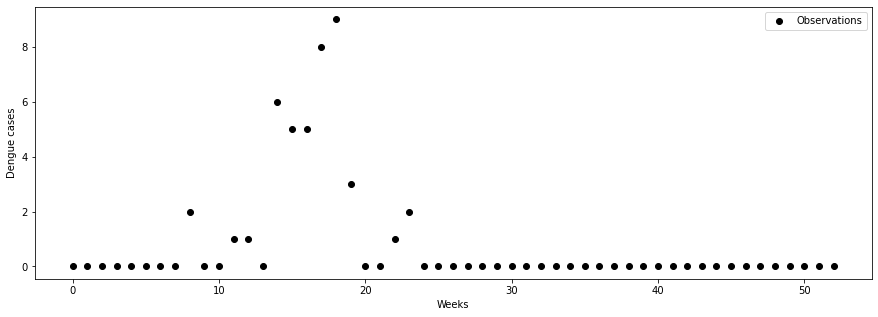

In [47]:
dataset = dataset.reset_index(drop=True)
# graficando 
graf = dataset['nuevosCasos']
#noise(graf)
plt.figure(figsize=(15,5));
#legend = plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Dengue cases')
#plt.title(depto)
plt.plot(graf,'ko',label="Observations")
plt.legend()
plt.show()

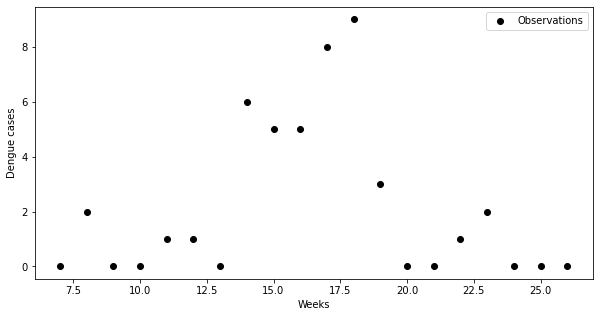

In [48]:
dataset = dataset[7:27]
# graficando 
graf = dataset['nuevosCasos']
#noise(graf)
plt.figure(figsize=(10,5));
#legend = plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Dengue cases')
#plt.title(depto)
plt.plot(graf,'ko',label="Observations")
plt.legend()
plt.show()

In [49]:
datos=graf.to_numpy()

In [67]:
import os
import pandas as pd
path = "./data/SIRSI/"
filename_read = os.path.join(path,"datosDengueTemperatura.csv")
data = pd.read_csv(filename_read,delimiter=",",engine='python')
data=data[data['Distrito']=='COMAS']
dataset_temperatura=data[data['Anho']==2017]
dataset_temperatura


,Unnamed: 0,Departamento,Distrito,casosAccumAnho,nuevosCasos,Semana,Anho,temp_mean,temp_max,temp_min,temp_wei
53,53,LIMA,COMAS,0,0,1,2017,23.525995,28.130482,20.309528,23.525995
54,54,LIMA,COMAS,0,0,2,2017,23.709393,28.593122,20.462337,23.709393
55,55,LIMA,COMAS,0,0,3,2017,23.847931,28.979440,20.582601,23.847931
56,56,LIMA,COMAS,0,0,4,2017,23.943569,29.291255,20.671554,23.943569
57,57,LIMA,COMAS,0,0,5,2017,23.998268,29.530390,20.730431,23.998268
58,58,LIMA,COMAS,0,0,6,2017,24.013988,29.698664,20.760465,24.013988
59,59,LIMA,COMAS,0,0,7,2017,25.879480,30.200000,22.300000,25.879480
60,60,LIMA,COMAS,1,1,8,2017,25.903571,30.700000,22.200000,25.903571
61,61,LIMA,COMAS,2,1,9,2017,26.599816,31.000000,23.300000,26.599816
62,62,LIMA,COMAS,2,0,10,2017,26.034324,31.700000,22.800000,26.034324


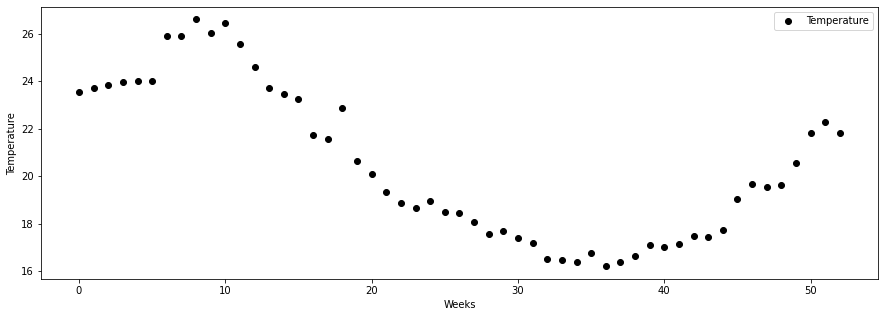

In [68]:
dataset_temperatura = dataset_temperatura.reset_index(drop=True)
# graficando 
graf = dataset_temperatura['temp_mean']
#noise(graf)
plt.figure(figsize=(15,5));
#legend = plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Temperature')
#plt.title(depto)
plt.plot(graf,'ko',label="Temperature")
plt.legend()
plt.show()

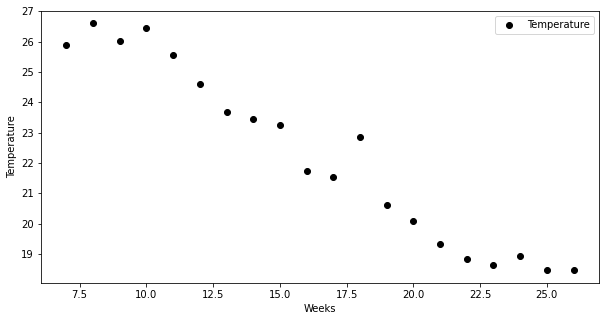

In [69]:
dataset_temperatura = dataset_temperatura[7:27]
# graficando 
graf_t = dataset_temperatura['temp_mean']
#noise(graf)
plt.figure(figsize=(10,5));
#legend = plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Temperature')
#plt.title(depto)
plt.plot(graf_t,'ko',label="Temperature")
plt.legend()
plt.show()

In [70]:
T=graf_t.to_numpy()

In [71]:
print(T)

[25.90357143 26.59981565 26.03432392 26.45682625 25.54658296 24.59970053
 23.69249173 23.45595238 23.2422619  21.72567252 21.55833333 22.85833333
 20.63630952 20.09583333 19.33392857 18.84702381 18.65297619 18.93869048
 18.46973455 18.46586128]


In [55]:
T[1]

26.599815654640505

In [56]:
print("y0",y0,"t",t,"x_1",x_1,"x_2",x_2)
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(x_1,x_2,N_h))
#ret = odeint(derivart, y0, t, args=(N, beta, gamma))
Sv, Iv, Sh, Ih, Rh = ret.T

y0 (69, 1, 34, 1, 0) t [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] x_1 0.381 x_2 1.0


In [57]:
from scipy.stats import poisson
from scipy.stats import norm

from scipy.integrate import odeint as ode
def m_a(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
def NLL(params, data): #negative log likelihood
    #print("params:::::",params)
    params = np.abs(params)
    x_1=params[0]
    x_2=params[1]
    k=params[2]
    y0 = S0_v, I0_v,k, I0_h, R0_h
    data = np.array(data)
    ret = odeint(deriv, y0, t, args=(x_1,x_2,k))
    Sv, Iv, Sh, Ih, Rh = ret.T
    y=Ih
    #nll = sum(y) - sum(data*np.log(y))
    # note this is a slightly shortened version--there's an additive constant term missing but it 
    # makes calculation faster and won't alter the threshold. Alternatively, can do:
    #nll = -sum(np.log(poisson.pmf(np.round(data),np.round(y)))) # the round is b/c Poisson is for (integer) count data
    # this can also barf if data and y are too far apart because the dpois will be ~0, which makes the log angry
    #nll = -sum(np.log(norm.pdf(data,y,0.1*m_a(data)))) 
    # ML using normally distributed measurement error (least squares)
    nll = -sum(np.log(norm.pdf(data,y,0.1*np.mean(data)))) # example WLS assuming sigma = 0.1*mean(data)
    #nll = sum((y - data)**2)  # alternatively can do OLS but note this will mess with the thresholds 
    #                             for the profile! This version of OLS is off by a scaling factor from
    #                             actual LL units.
    return nll

<ipython-input-57-d5d5998e9db8>:27: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(norm.pdf(data,y,0.1*np.mean(data)))) # example WLS assuming sigma = 0.1*mean(data)
C:\Users\juanv\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[3.10900750e-01 4.02814837e-03 8.53959421e+02] 0.31090075039557535 0.004028148367581974 853.9594208452756
y0:  (69, 1, 34, 1, 0) t:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] x_1:  0.31090075039557535 x_2:  0.004028148367581974 k_est:  853.9594208452756


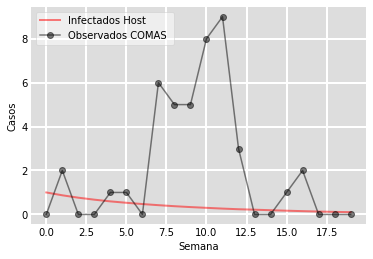

In [58]:
import scipy.optimize as optimize
x_1=0.3
x_2=0.9
k=220
params=[x_1,x_2,k]
data = np.array(datos)
#optimizer = optimize.minimize(NLL, params, args=(datos), method='Nelder-Mead')
bounds = [(0.0,1.0),(0.0,1.0),(0.0,1000.0)]
optimizer = optimize.differential_evolution(NLL, bounds, args=(datos,))
paramests = np.abs(optimizer.x)
x_1est=paramests[0] 
x_2est=paramests[1]
k_est=paramests[2]
print(paramests,x_1est,x_2est,k_est)
#t = np.linspace(0, 20, 20)
t= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
print("y0: ",y0,"t: ",t,"x_1: ",x_1est,"x_2: ",x_2est, "k_est: ",k_est)
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(x_1est,x_2est,k_est))
#ret = odeint(derivart, y0, t, args=(N, beta, gamma))
Sv, Iv, Sh, Ih, Rh = ret.T
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
#ax.plot(t, Iv/N_v, 'orange', alpha=0.5, lw=2, label='Infectados Vector')
#ax.plot(t, Sv/N_v, 'cyan', alpha=0.5, lw=2, label='Susceptible Vector ')
#ax.plot(t, Sh, 'b', alpha=0.5, lw=2, label='Susceptible Host')
ax.plot(t, Ih, 'r', alpha=0.5, lw=2, label='Infectados Host')
#ax.plot(t, Rh, 'g', alpha=0.5, lw=2, label='Recuperados Host ')
ax.plot(t, datos, 'black', alpha=0.5, marker='o', label='Observados COMAS ')
ax.set_xlabel('Semana')
ax.set_ylabel('Casos')
#ax.set_ylim(0,2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


In [59]:
#def derivart(y, t, N, beta, gamma):
#    S, I ,R = y
#    dSdt = -beta * S * I / N
#    dIdt = beta * S * I / N - gamma * I
#    dRdt = gamma * I
#    return dSdt, dIdt, dRdt

In [60]:
import scipy.stats as stats 

In [61]:
def log_prior(theta):
    beta, gamma = theta
   #print("here")
    lp=np.log(stats.gamma.pdf(beta, a=0.6, scale=10000))+np.log(stats.gamma.pdf(gamma, a=0.7, scale=100))
    return lp

In [62]:
def log_probability(theta, data, times,k):
    lp = log_prior(theta)
   # print(theta)
    if not np.isfinite(lp):
        return -np.inf
    nl= NLLNew(theta,data,times,k)
  
    return lp - nl

In [63]:
def NLLNew(params, data, times,k): #negative log likelihood
	params = np.abs(params)
	data = np.array(data)
	res = ode(model, x0fcnNew(params,data,k), times, args=(params,))
	y = yfcnNew(res, params,k)
	#nll = sum(y) - sum(data*np.log(y))
	# note this is a slightly shortened version--there's an additive constant term missing but it 
	# makes calculation faster and won't alter the threshold. Alternatively, can do:
	nll = -sum(np.log(poisson.pmf(np.round(data),np.round(y)))) # the round is b/c Poisson is for (integer) count data
	# this can also barf if data and y are too far apart because the dpois will be ~0, which makes the log angry
	#nll = -sum(np.log(norm.pdf(data,y,0.1*m_a(data)))) 
	# ML using normally distributed measurement error (least squares)
	# nll = -sum(np.log(norm.pdf(data,y,0.1*np.mean(data)))) # example WLS assuming sigma = 0.1*mean(data)
	# nll = sum((y - data)**2)  # alternatively can do OLS but note this will mess with the thresholds 
	#                             for the profile! This version of OLS is off by a scaling factor from
	#                             actual LL units.
	return nll

def x0fcnNew(params, data,k):
	S0 = 1.0 - (data[0]/k)
	I0 = data[0]/k
	R0 = 0.0
	X0 = [S0, I0, R0]

	return X0


def yfcnNew(res, params,k):
	return res[:,1]*k


In [64]:
import emcee

In [65]:
paramests[0:2]

array([0.31090075, 0.00402815])

In [66]:
# Initialize the walkers
coords = paramests[0:2]+ 1e-9 * np.random.randn(30,2)
nwalkers, ndim = coords.shape

# Set up the backend
# Don't forget to clear it in case the file already exists
filename = "tutorial3.h5"
backend = emcee.backends.HDFBackend(filename)
backend.reset(nwalkers, ndim)

# Initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim,log_probability, args=(data,times,paramests[2]), backend=backend)


NameError: name 'times' is not defined

In [ ]:
max_n = 10000

# We'll track how the average autocorrelation time estimate changes
index = 0
autocorr = np.empty(max_n)

# This will be useful to testing convergence
old_tau = np.inf

# Now we'll sample for up to max_n steps
for sample in sampler.sample(coords, iterations=max_n, progress=True):
    # Only check convergence every 100 steps
    if sampler.iteration % 200:
        continue

    # Compute the autocorrelation time so far
    # Using tol=0 means that we'll always get an estimate even
    # if it isn't trustworthy
    tau = sampler.get_autocorr_time(tol=0)
    autocorr[index] = np.mean(tau)
    index += 1
    print(tau)
    # Check convergence
    converged = np.all(tau * 100 < sampler.iteration)
    converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
    if converged:
        break
    old_tau = tau

In [ ]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["gamma", "beta"]
for i in range(2):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
tau = sampler.get_autocorr_time()
print(tau)

In [ ]:
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples= sampler.get_chain(discard=burnin, flat=True, thin=thin)
flat_pro  =sampler.get_log_prob(discard=burnin, flat=True, thin=thin)
log_prior_samples = sampler.get_blobs(discard=burnin, flat=True, thin=thin)

In [ ]:
df=pd.DataFrame(np.column_stack((flat_samples,flat_pro)),columns=['A', 'B', 'D'])

In [ ]:
df.head()

In [ ]:
df=df.sort_values(by='D',ascending=False)

In [ ]:
df.head(50)

In [ ]:
df.values[:10,0:4]

In [ ]:
import corner

fig = corner.corner(
    df.values[:,0:2], labels=labels)

In [ ]:
inds = np.random.randint(len(flat_samples), size=1000)
for ind in inds:
    sample = flat_samples[ind]
    xest = ode(model, iniests, times, args=(np.hstack((sample,paramests[2])),))
    est_measure = yfcnNew(xest, sample,paramests[2])
    xest1 = ode(model, iniests, times, args=(paramests,))
    est_measure1 = yfcn(xest, paramests)
    #print(NLL( sample,data,times))
    plt.plot(times, est_measure, "C1", alpha=0.1)
    plt.plot(times, data, 'ko', linewidth=1)
plt.plot(times, est_measure1, 'b-', linewidth=3)
#plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
#plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
#plt.legend(fontsize=14)
#plt.xlim(0, 10)
#plt.xlabel("x")
#plt.ylabel("y");
plt.legend(['Inferencia Bayesiana','Datos observados','MLE'])
    #plt.show()

#xest = ode(sir_ode.model, iniests, times, args=(paramests,))
#est_measure = sir_ode.yfcn(xest, paramests)

In [ ]:
beta_mcmc, gamma_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(flat_samples, [16, 50, 84],
                                                axis=0)))

print(beta_mcmc)
print(gamma_mcmc)